In [1]:
#!python3.7
""" HW6-question 6 (a and b) Kiran Pandey
    - Median heat flow replotted form the data
Hasterok. D, 2012, A heat based cooling model for tectonic plates.
EPSL 361, 34-43.
"""
#==============================================================================
#                                   Import Modules
#==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#==============================================================================
#                                   Function Define
#==============================================================================
def heat_flow(t):
    if t<=55:
        return 510/t**0.5
    else:
        return  48 + 96 * np.exp(-0.0278*t)


In [3]:
#==============================================================================
#                                   Data and Parameters
#==============================================================================
data_file = pd.read_excel('Hasterok-EPSL-2013-Data.xlsx',usecols = [0,7,9,10], names = ['Age_bin', 'Q2','Q2-Q1','Q3-Q2'])
#load data from the coloumn
age_bin = data_file['Age_bin']
Median = data_file['Q2']
upper_q = data_file['Q3-Q2']
lower_q = data_file['Q2-Q1']

age_globally_unfiltered = age_bin[32:79]
Median_globally_unfiltered = Median[32:79]
upper_q_globally_unfiltered = upper_q[32:79]
lower_q_globally_unfiltered = lower_q[32:79]
yerr_globally_unfiltered = np.array(lower_q_globally_unfiltered,upper_q_globally_unfiltered)
#print(age_globally_unfiltered)

age_globally_filtered = age_bin[14:30]
Median_globally_filtered = Median[14:30]
upper_q_globally_filtered = upper_q[14:30]
lower_q_globally_filtered = lower_q[14:30]
yerr_globally_filtered = np.array(lower_q_globally_filtered,upper_q_globally_filtered)
#print(age_globally_filtered)

age_site_specific =  age_bin[3:12]
Median_site_specific = Median[3:12]
upper_q_site_specific  = upper_q[3:12]
lower_q_site_specific  = lower_q[3:12]
yerr_site_specific = np.array(lower_q_site_specific,upper_q_site_specific)
#print(age_site_specific)


In [4]:
x = list(age_site_specific) + list(age_globally_filtered) +list(age_globally_unfiltered)
GDH1=[]
for t in x:
    GDH1.append(heat_flow(t))
#print(GDH1)

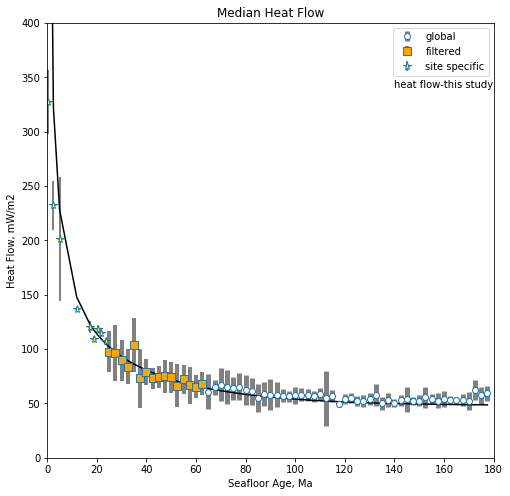

In [9]:
#==============================================================================
#                                   Plot
#==============================================================================
#upperlimits = [True, False] * 5
#lowerlimits = [False, True] * 5
plt.figure(figsize = (8,8))

plt.errorbar(age_globally_unfiltered, Median_globally_unfiltered,fmt='o',markerfacecolor='white', \
             markersize=6,yerr=yerr_globally_unfiltered,ecolor='gray',elinewidth=5, label='global')
plt.errorbar(age_globally_filtered, Median_globally_filtered,fmt='s',markerfacecolor='orange', \
             markersize=8,yerr=yerr_globally_filtered,ecolor='gray',elinewidth=4, label='filtered')
plt.errorbar(age_site_specific, Median_site_specific,fmt='*',markerfacecolor='yellow', \
             markersize=8,yerr=yerr_site_specific,ecolor='gray',elinewidth=2, label='site specific')
plt.plot(x,GDH1,color='black')
plt.title('Median Heat Flow')
plt.xlabel('Seafloor Age, Ma')
plt.ylabel('Heat Flow, mW/m2')
plt.text(140, 340, 'heat flow-this study', dict(size=10))
plt.ylim(0, 400)
plt.xlim(0, 180)
plt.legend()
